In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#1. Import the dataset into the system
dataset = pd.read_csv('/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
#2. Show how many rows and columns are present
dataset.shape

(9668, 12)

In [5]:
#3. What is a datatype of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [6]:
#4. If datatype is different then expected then change it

#4a. Change show_id to integer by removing letter 's'

dataset['show_id']=dataset['show_id'].str.replace('s', '').astype(int)

#4b. Date_added should be in date format

dataset['date_added']=pd.to_datetime(dataset['date_added'])
dataset['year_added'] = dataset['date_added'].dt.year
dataset['month_added']= dataset['date_added'].dt.month

In [7]:
#5. Check for missing values in the dataset. #Missing Data: Director, Cast, Country, Date_added, rating
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   int64         
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7586 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
 12  year_added    155 non-null    float64       
 13  month_added   155 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [8]:
dataset.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
#6. Show missing values % in each column
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_dataset = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
print(percent_missing)

show_id          0.000000
type             0.000000
title            0.000000
director        21.534961
cast            12.753413
country         93.049235
date_added      98.396773
release_year     0.000000
rating           3.485726
duration         0.000000
listed_in        0.000000
description      0.000000
year_added      98.396773
month_added     98.396773
dtype: float64


In [10]:
#7. Divide the column duration into duration_movie and duration_season

dataset['duration_season'] = dataset.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else 0, axis = 1)
dataset['duration_movie'] = dataset.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else 0, axis = 1)

In [11]:
dataset.head()#8. Divide column 'listed_in' by genre1, genre2...

dataset['Genre1'] = dataset['listed_in'].str.split(',', expand=True)[0]
dataset['Genre2'] = dataset['listed_in'].str.split(',', expand=True)[1]
dataset['Genre3'] = dataset['listed_in'].str.split(',', expand=True)[2]
dataset['Genre4'] = dataset['listed_in'].str.split(',', expand=True)[3]
dataset['Genre5'] = dataset['listed_in'].str.split(',', expand=True)[4]

In [12]:
#9. What is the time period range of this dataset (hint: release_year)

dataset_range = range(max(dataset.release_year), min(dataset.release_year))
print(dataset_range)

range(2021, 1920)


In [13]:
#10. How many movies and tv shows are present. Show both count and % of total

dataset.type.value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

In [14]:
#10. How many movies and tv shows are present. Show both count and % of total
dataset.type.value_counts(normalize=True)*100

Movie      80.823335
TV Show    19.176665
Name: type, dtype: float64

In [15]:
#11. What type of movies are generally based on according to Genre1

print(dataset[dataset['type']=='Movie']['Genre1'].value_counts())

Drama                        1922
Action                       1502
Comedy                       1253
Documentary                   623
Horror                        522
Arts                          420
Animation                     256
Kids                          254
Suspense                      187
Arthouse                      131
Special Interest              120
Romance                       119
Western                       100
Music Videos and Concerts     100
Fitness                        72
Science Fiction                68
Adventure                      59
International                  37
Fantasy                        16
Anime                          16
Faith and Spirituality         12
LGBTQ                          10
Military and War                5
Sports                          5
Historical                      3
Young Adult Audience            2
Name: Genre1, dtype: int64


In [16]:
#12. What type of TV shows are generally based on according to Genre1

print(dataset[dataset['type']=='TV Show']['Genre1'].value_counts())

Drama                        294
Documentary                  290
TV Shows                     263
Animation                    242
Comedy                       222
Action                       155
Kids                         119
Special Interest              68
Arts                          37
Unscripted                    29
Anime                         28
Science Fiction               17
Sports                        14
Horror                        13
Adventure                     12
Fitness                       11
International                 10
Romance                        7
Suspense                       7
Talk Show and Variety          3
LGBTQ                          3
Music Videos and Concerts      3
Fantasy                        2
Western                        2
Young Adult Audience           1
Arthouse                       1
Faith and Spirituality         1
Name: Genre1, dtype: int64


In [17]:
#13. Clean the new duration column and remove min and season from numbers

dataset['duration_movie'] = dataset['duration_movie'].astype(int)
dataset['duration_season'] = dataset['duration_season'].astype(int)

In [18]:
#14. What is average time of movie by Genre1

dataset.groupby('Genre1').agg({'duration_movie':('mean')})

,duration_movie
Genre1,
Action,91.585395
Adventure,81.619718
Animation,26.632530
Anime,31.227273
Arthouse,91.204545
Arts,67.477024
Comedy,82.231864
Documentary,55.782037
Drama,87.027978


In [19]:
#15. What is the average seasons of tv shows by genre1
dataset.groupby('Genre1').agg({'duration_season':('mean')})

,duration_season
Genre1,
Action,0.161135
Adventure,0.197183
Animation,0.857430
Anime,0.795455
Arthouse,0.007576
Arts,0.113786
Comedy,0.307119
Documentary,0.483023
Drama,0.219765


In [20]:
#16. Highest movies and tv shows by Director
dire = dataset[dataset['type']=='Movie']['director'].value_counts()
print(dire)


Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
                        ... 
Andrew Traucki             1
Karyn Kusama               1
K. Subash                  1
Robert Cuffley             1
Steve Barker               1
Name: director, Length: 5774, dtype: int64


In [21]:
markk = dataset['director'].str.startswith('Mark')
print(markk)

0       False
1       False
2       False
3       False
4       False
        ...  
9663    False
9664      NaN
9665    False
9666      NaN
9667    False
Name: director, Length: 9668, dtype: object


In [22]:
#16. Highest movies and tv shows by Director ANS: NONE
tvs = dataset[dataset['type']=='TVShow']['director'].value_counts()
print(tvs)

Series([], Name: director, dtype: int64)


<AxesSubplot:xlabel='count', ylabel='Genre1'>

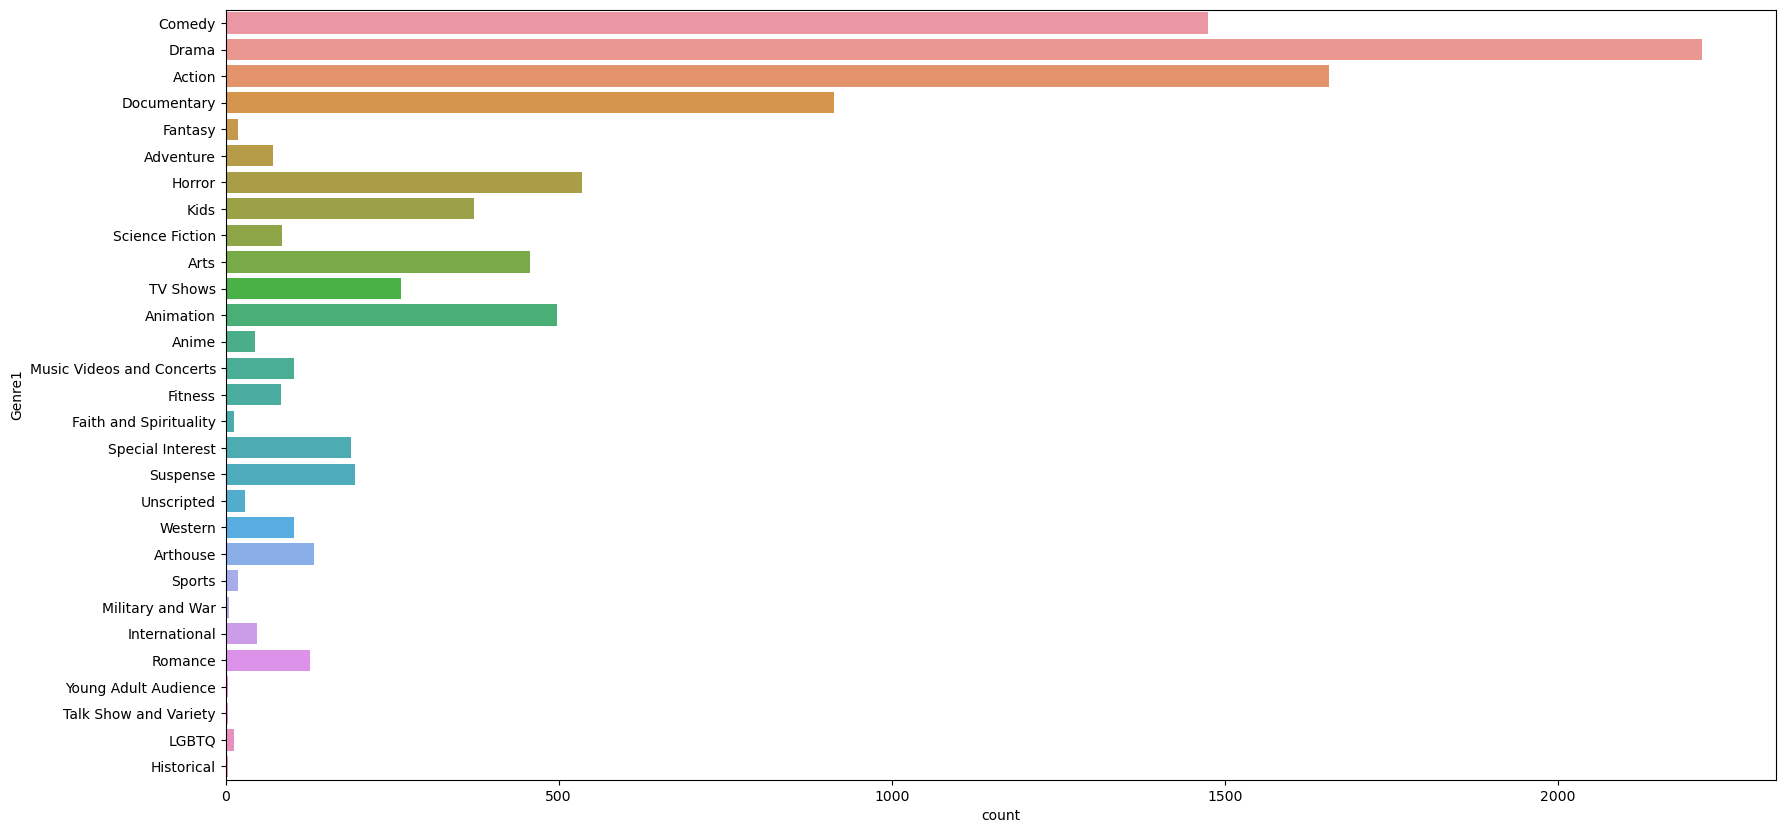

In [23]:
import seaborn as sns
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Genre1', data=dataset)

In [24]:
#17. Which type of genre generally have highest and smallest duration in movie
movie1 = dataset.sort_values('duration_movie', ascending = False)
movie1[['title', 'duration_movie']][:1]

,title,duration_movie
933,Soothing Surf at Del Norte for Sleep black screen,601


In [25]:
movie2 = dataset.sort_values('duration_movie', ascending = True)
movie2 = movie2[movie2['duration_movie'] >= 10]
movie2[['title', 'duration_movie']]

,title,duration_movie
1894,Learn Colors and Race Cars with Max the Glow T...,10
5950,Gretchen - The Tragedy,10
9530,The A Team: Making a Scene,10
9558,Date Night: Making a Scene,10
6340,Dinosaur Park Mission Part 5 - T-Rex Ranch,10
...,...,...
2368,Gentle evening rain,541
2367,Gentle Midnight Rain black screen 9 hours,541
5214,Black Screen Ocean Waves for Sleep 9 hours,541
3850,Himalayan Singing Bowls 9 hours,550


In [26]:
#18. Each year how many movie and tv show released
dataset[dataset['type']=='Movie'].release_year.value_counts()

2021    1139
2020     736
2019     730
2018     438
2017     404
        ... 
1926       2
1922       2
1923       1
1924       1
1927       1
Name: release_year, Length: 100, dtype: int64

In [27]:
#18. Each year how many movie and tv show released
dataset[dataset['type']=='TV Show'].release_year.value_counts()

2021    303
2020    226
2019    199
2018    185
2017    158
2016    119
2014     96
2015     96
2013     62
2012     55
2011     40
2010     34
2008     33
2009     32
2005     21
2007     19
2006     18
2004     14
2003     13
1995     10
1999      9
2001      9
2000      9
2002      9
1998      7
1989      6
1997      6
1978      5
1986      4
1990      4
1992      4
1993      3
1954      3
1991      3
1984      3
1981      3
1974      3
1994      3
1969      2
1985      2
1959      2
1988      2
1963      2
1967      2
1996      2
1932      1
1987      1
1968      1
1946      1
1960      1
1962      1
1955      1
1961      1
1945      1
1972      1
1979      1
1936      1
1975      1
1983      1
Name: release_year, dtype: int64